## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
#required imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [12]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",
                        index_col=0)
dataset.columns = dataset.iloc[0]
dataset.drop(['ID'], inplace=True)

In the following, you can take a look into the dataset.

In [14]:
dataset.head(10)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [24]:
dataset = dataset.apply(pd.to_numeric)

In [37]:
dataset.shape

(30000, 24)

## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [122]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = dataset.loc[:,'LIMIT_BAL':'PAY_AMT6']
y = dataset['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [86]:
# First model, default parameters
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4726, 1069],
       [1020,  685]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      5795
           1       0.23      0.13      0.17      1705

    accuracy                           0.70      7500
   macro avg       0.50      0.50      0.49      7500
weighted avg       0.65      0.70      0.67      7500



In [87]:
tree_clf.tree_.max_depth

44

In [69]:
# Second model, entropy criterion
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4715, 1080],
       [1015,  690]], dtype=int64)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5795
           1       0.39      0.40      0.40      1705

    accuracy                           0.72      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.72      0.72      0.72      7500



In [71]:
# Third model, min_samples_leaf as percentage
tree_clf = DecisionTreeClassifier(min_samples_leaf=0.1)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5551,  244],
       [1165,  540]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5795
           1       0.69      0.32      0.43      1705

    accuracy                           0.81      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.81      0.78      7500



Changing the criterion improves the results. However, changing parameters related to the depth of the tree, in this case minimum number of samples required in a leaf, changes drastically the performance, which possibly avoids overfitting.

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [82]:
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3, 5, None],
          'min_samples_split': [10,20,50]}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         params,
                         random_state=0)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, None],
                                        'min_samples_split': [10, 20, 50]},
                   random_state=0)

In [83]:
clf.best_params_

{'min_samples_split': 20, 'max_depth': 3, 'criterion': 'gini'}

In [100]:
pd.DataFrame(clf.best_estimator_.feature_importances_, index=clf.best_estimator_.feature_names_in_, columns=['Importance']) \
    .sort_values('Importance', ascending=False)

,Importance
PAY_0,0.774630
PAY_2,0.146630
PAY_AMT2,0.047399
PAY_6,0.016879
PAY_3,0.010077
BILL_AMT1,0.004384
BILL_AMT4,0.000000
PAY_AMT5,0.000000
PAY_AMT4,0.000000
PAY_AMT3,0.000000


In [84]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5478,  317],
       [1079,  626]], dtype=int64)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5795
           1       0.66      0.37      0.47      1705

    accuracy                           0.81      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.81      0.79      7500



Randomized search make possible to improve the model even more. The best max depth is only three, the original tree had a depth of 44, which confirms the hypothesis that that model was overfitting.


#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [101]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rff = RandomForestClassifier()
rff.fit(X_train,y_train)

y_pred = rff.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5455,  340],
       [1094,  611]], dtype=int64)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5795
           1       0.64      0.36      0.46      1705

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500



To be able to plot the learning curves, I reduced the independent variables to one using PCA, plotting the resultant as x-axis, and the label as y-axis. The predicted label is shown as the color.

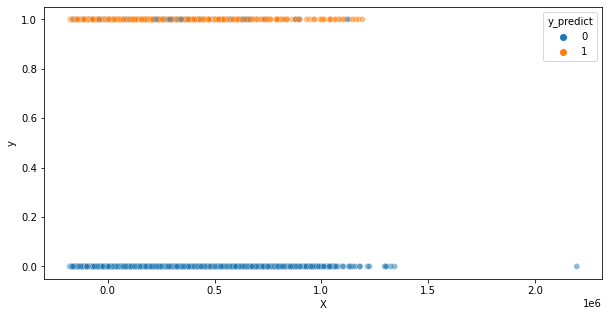

In [178]:
pca = PCA(n_components=1)
df_plot = pd.DataFrame(
    {'X': pca.fit_transform(X).reshape(1,-1).tolist()[0],
     'y': y.tolist(),
     'y_predict': rff.predict(X)}
)

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='X', y='y', data=df_plot, hue = 'y_predict', alpha=0.5, ax=ax)
plt.show()

In [194]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier

rff = RandomForestClassifier()
rff.fit(X_train,y_train)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200)

ada_clf.fit(X_train,y_train)

y_pred = ada_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5450,  376],
       [1043,  631]], dtype=int64)

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5826
           1       0.63      0.38      0.47      1674

    accuracy                           0.81      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.79      0.81      0.79      7500



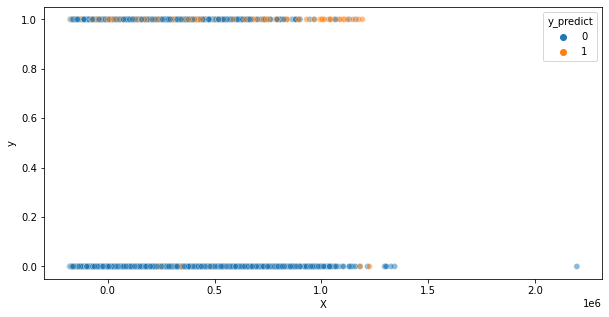

In [185]:
pca = PCA(n_components=1)
df_plot = pd.DataFrame(
    {'X': pca.fit_transform(X).reshape(1,-1).tolist()[0],
     'y': y.tolist(),
     'y_predict': ada_clf.predict(X)}
)

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='X', y='y', data=df_plot, hue = 'y_predict', alpha=0.5, ax=ax)
plt.show()

In [186]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

rff = RandomForestClassifier()
rff.fit(X_train,y_train)

ecl = ExtraTreesClassifier()

ecl.fit(X_train,y_train)

y_pred = ecl.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5474,  352],
       [1061,  613]], dtype=int64)

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5826
           1       0.64      0.37      0.46      1674

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.79      0.81      0.79      7500



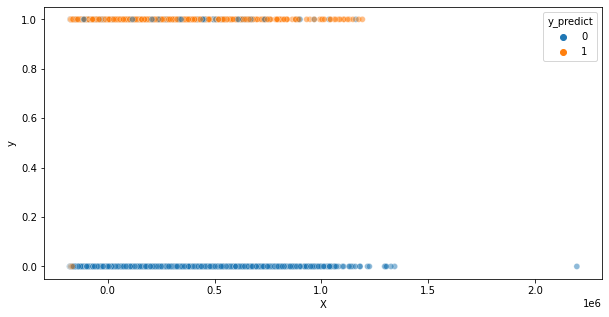

In [188]:
pca = PCA(n_components=1)
df_plot = pd.DataFrame(
    {'X': pca.fit_transform(X).reshape(1,-1).tolist()[0],
     'y': y.tolist(),
     'y_predict': ecl.predict(X)}
)

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='X', y='y', data=df_plot, hue = 'y_predict', alpha=0.5, ax=ax)
plt.show()

In [189]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gcl = GradientBoostingClassifier()
gcl.fit(X_train,y_train)

gcl = ExtraTreesClassifier()

gcl.fit(X_train,y_train)

y_pred = gcl.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5477,  349],
       [1057,  617]], dtype=int64)

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5826
           1       0.64      0.37      0.47      1674

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.79      0.81      0.79      7500



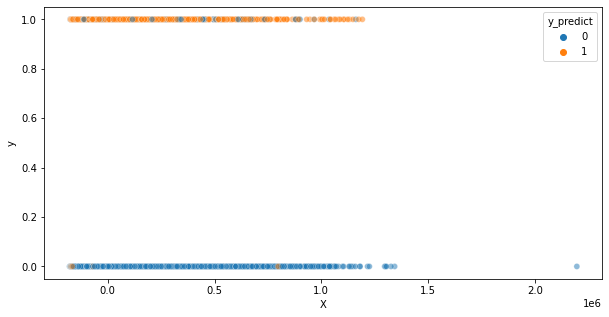

In [191]:
pca = PCA(n_components=1)
df_plot = pd.DataFrame(
    {'X': pca.fit_transform(X).reshape(1,-1).tolist()[0],
     'y': y.tolist(),
     'y_predict': gcl.predict(X)}
)

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='X', y='y', data=df_plot, hue = 'y_predict', alpha=0.5, ax=ax)
plt.show()

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

Changing the hyperparameters improves significantly the performance for the Tree Decision model, in particular the parameters related to the depth of the tree, which avoids overfitting.

The ensemble models perform better than the simple Decision Tree, that's because they avoids overfiting without the necessity of tuning hyperparameters. In the case when the Decision Tree is tuned with a Randomized Search, the performance between the tuned model and the ensemble models are similar.

Both, Decision Trees and Ensamble Models performs as the way is expected due each model's characteristics. Ensemble models tends to have a better performance. Between the Ensamble Models, Gradient Boosting is slightly better than the rest.